STOCK PREDICTION USING RNN FOR S&P500

In [1]:
import pandas_datareader as webreader 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
from datetime import date, timedelta

Setting the timeframe for data extraction

In [2]:
today=date.today()
date_today=today.strftime("%Y-%m-%d") 
date_start='2015-01-01'

In [5]:
stockname='S&P500'
symbol='^GSPC'
df = webreader.DataReader(
    symbol, start=date_start, end=date_today, data_source="yahoo")

print(df.shape)
print(df)

(1441, 6)
                   High          Low         Open        Close      Volume  \
Date                                                                         
2014-12-31  2085.580078  2057.939941  2082.110107  2058.899902  2606070000   
2015-01-02  2072.360107  2046.040039  2058.899902  2058.199951  2708700000   
2015-01-05  2054.439941  2017.339966  2054.439941  2020.579956  3799120000   
2015-01-06  2030.250000  1992.439941  2022.150024  2002.609985  4460110000   
2015-01-07  2029.609985  2005.550049  2005.550049  2025.900024  3805480000   
...                 ...          ...          ...          ...         ...   
2020-09-15  3419.479980  3389.250000  3407.729980  3401.199951  4051460000   
2020-09-16  3428.919922  3384.449951  3411.229980  3385.489990  4710030000   
2020-09-17  3375.169922  3328.820068  3346.860107  3357.010010  4371940000   
2020-09-18  3362.270020  3292.399902  3357.379883  3319.469971  7068700000   
2020-09-21  3285.570068  3229.100098  3285.570068  324

Plotting the chart 


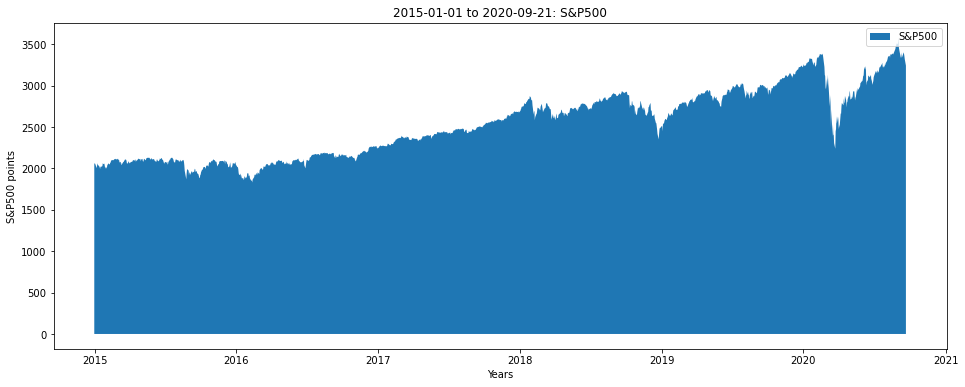

In [10]:

year=mdates.YearLocator()
figure, axis1=plt.subplots(figsize=(16,6))
axis1.xaxis.set_major_locator(year)
x=df.index
y=df['Close']
axis1.fill_between(x,0,y)
axis1.legend([stockname])
plt.title(date_start + " to " + date_today + ": " + stockname)
plt.ylabel('S&P500 points') 
plt.xlabel('Years') 
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM

In [21]:
data=df.filter(['Close']) 
np_array_data=data.values


Splitting the dataset into training dataset and testing dataset. 80% Training, 20% Testing

In [22]:
import math
training_dataset_length=math.ceil(len(np_array_data)*0.8)
print(training_dataset_length)

1153


Feature scaling to a range between 0 and 1

In [23]:
data_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=data_scalar.fit_transform(np_array_data)
scaled_data

array([[0.13119373],
       [0.13079416],
       [0.10931862],
       ...,
       [0.87222561],
       [0.85079572],
       [0.80608064]])

Creating a scaled training dataset

In [27]:
train_data=scaled_data[0:training_dataset_length, :]

#split the data into x_train and y_train
x_train=[]
y_train=[]
trainingdatasize=len(train_data)
for i in range(100, trainingdatasize):
    x_train.append(train_data[i-100 : i,0])
    y_train.append(train_data[i, 0])
    
x_train=np.array(x_train)
y_train=np.array(y_train)

In [28]:
#Reshaping the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[[0.13119373]
  [0.13079416]
  [0.10931862]
  ...
  [0.17224967]
  [0.1695324 ]
  [0.15705346]]

 [[0.13079416]
  [0.10931862]
  [0.09906038]
  ...
  [0.1695324 ]
  [0.15705346]
  [0.16805955]]

 [[0.10931862]
  [0.09906038]
  [0.1123556 ]
  ...
  [0.15705346]
  [0.16805955]
  [0.16652399]]

 ...

 [[0.53795607]
  [0.52510042]
  [0.52175529]
  ...
  [0.67959082]
  [0.67051986]
  [0.68318723]]

 [[0.52510042]
  [0.52175529]
  [0.54472075]
  ...
  [0.67051986]
  [0.68318723]
  [0.68039567]]

 [[0.52175529]
  [0.54472075]
  [0.54941316]
  ...
  [0.68318723]
  [0.68039567]
  [0.6759487 ]]]
[0.16805955 0.16652399 0.15887446 ... 0.68039567 0.6759487  0.65722464]
(1053, 100, 1)
(1053,)


Building the RNN Model

In [29]:
model=Sequential()

#Model has 100 neurons, inputshape= 100 timestamps
model.add(LSTM(100,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [32]:
#compiling the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Training the model
model.fit(x_train, y_train, batch_size=16, epochs=25)

Train on 1053 samples
Epoch 1/25
1053/1053 [==============================] - 32s 31ms/sample - loss: 0.0148
Epoch 2/25
1053/1053 [==============================] - 15s 15ms/sample - loss: 7.8249e-04
Epoch 3/25
1053/1053 [==============================] - 15s 15ms/sample - loss: 7.2844e-04
Epoch 4/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 8.3007e-04
Epoch 5/25
1053/1053 [==============================] - 15s 15ms/sample - loss: 7.8748e-04
Epoch 6/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 6.6476e-04
Epoch 7/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 6.7679e-04
Epoch 8/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 6.0070e-04
Epoch 9/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 6.1099e-04
Epoch 10/25
1053/1053 [==============================] - 15s 14ms/sample - loss: 6.0784e-04
Epoch 11/25
1053/1053 [==============================] - 15s 14ms/sampl

In [34]:
#Evaluating the model 
test_data=scaled_data[training_dataset_length-100: , :]
x_test=[]
y_test=np_array_data[training_dataset_length:,:]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i,0])
    
x_test=np.array(x_test)

x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
    

In [36]:
#Make predictions
predictions=model.predict(x_test)
predictions=data_scalar.inverse_transform(predictions)

Plotting Test Predictions

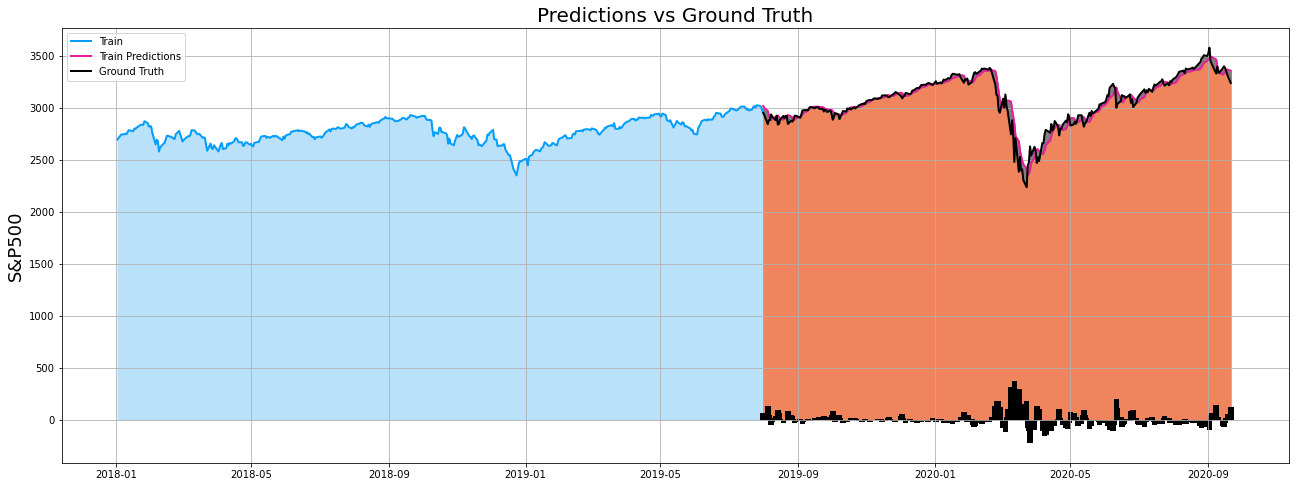

In [37]:
# The date from which on the date is displayed
display_start_date = "2018-01-01" 

# Add the difference between the valid and predicted prices
train = data[:training_dataset_length + 1]
valid = data[training_dataset_length:]
valid.insert(1, "Predictions", predictions, True)
valid.insert(1, "Difference", valid["Predictions"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid.index > display_start_date]
train = train[train.index > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 8), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Predictions"]]
plt.title("Predictions vs Ground Truth", fontsize=20)
plt.ylabel(stockname, fontsize=18)
plt.plot(yt, color="#039dfc", linewidth=2.0)
plt.plot(yv["Predictions"], color="#E91D9E", linewidth=2.0)
plt.plot(yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Train Predictions", "Ground Truth"], loc="upper left")

# Fill between plotlines
ax1.fill_between(xt, 0, yt["Close"], color="#b9e1fa")
ax1.fill_between(xv, 0, yv["Predictions"], color="#F0845C")
ax1.fill_between(xv, yv["Close"], yv["Predictions"], color="grey") 

# Create the bar plot with the differences
x = valid.index
y = valid["Difference"]
plt.bar(x, y, width=5, color="black")
plt.grid()
plt.show()

Making predictions for the day ahead

In [39]:
# Get fresh data until today and create a new dataframe with only the price data
price_quote = webreader.DataReader(symbol, data_source='yahoo', start=date_start, end=date_today)
new_df = price_quote.filter(['Close'])

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = data_scalar.transform(new_df[-100:].values)

# Create an empty list and Append past 100 days
X_test = []
X_test.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price = data_scalar.inverse_transform(pred_price)
date_tomorrow = date.today() + timedelta(days=1)
print('The price for ' + stockname + ' at ' + date_today + ' was: ' + str(round(df.at[df.index.max(), 'Close'])))
print('The predicted ' + stockname + ' price at date ' + str(date_tomorrow) + ' is: ' + str(round(pred_price[0, 0], 0)))

The price for S&P500 at 2020-09-21 was: 3241.0
The predicted S&P500 price at date 2020-09-23 is: 3322.0
